# Exercise

1. Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.
2. Measure prediction score using default n_estimators
3. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

Lets load the iris flower dataset

In [6]:
#Write your Code Here
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)


['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

## Understand the dataset
1. iris.DESCR > Complete description of dataset
2. iris.data > Data to learn. Each training set is 4 digit array of features. Total 150 training sets
3. iris.feature_names > Array of all 4 feature ['sepal length (cm)','sepal width cm)','petal length (cm)','petal width (cm)']
4. iris.filename > CSV file name
5. iris.target > The classification label. For every training set there is one classification label(0,1,2). Here 0 for setosa, 1 for versicolor and 2 for virginica
6. iris.target_names > the meaning of the features. Its a array >> ['setosa', 'versicolor', 'virginica']
From above details its clear that our data is 'iris.data' and labels are 'iris.target'

Each training example in iris.data is a array of iris.feature_names lets create a dataframe

In [15]:
#Write your Code Here
df =pd.DataFrame(iris.data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Add the target cilumn to it

In [19]:
#Write your Code Here
df['target'] = iris.target
df

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Split the dataframe

In [18]:
#creating x and y for spliting
X = df.drop(['target'],axis='columns')
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
#creating y for spliting
y= df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

print("len of X_train is %s" % (len(X_train)))
print("len of X_test is %s" % (len(X_test)))
print("len of y_train is %s" % (len(y_train)))
print("len of y_test is %s" % (len(y_test)))

len of X_train is 120
len of X_test is 30
len of y_train is 120
len of y_test is 30


## Train the model with Random Forest Algorithm

In [24]:
#Write your Code Here
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
trainScore=model.score(X_train,y_train)
testScore=model.score(X_test,y_test)
print('Train Score\n',trainScore,'\nTest Score\n',testScore)

Train Score
 1.0 
Test Score
 0.8666666666666667


In [32]:
from sklearn.metrics import accuracy_score
y_predicted = model.predict(X_test)
accuracy_score(y_test, y_predicted)

0.8666666666666667

In [49]:
from sklearn.metrics import accuracy_score
y_predicted = model.predict(X_train)
accuracy_score(y_train, y_predicted)

0.9916666666666667

In [35]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_predicted)
cm

array([[ 7,  0,  0],
       [ 0, 13,  0],
       [ 0,  4,  6]])

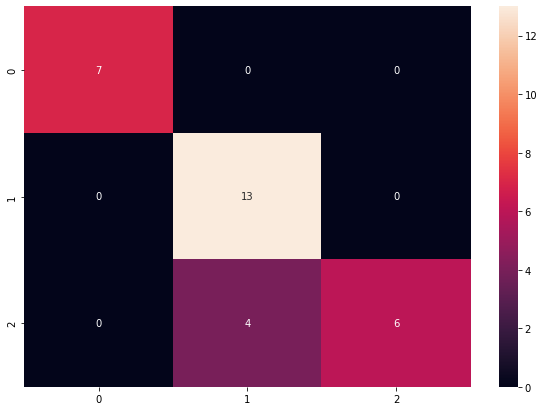

In [36]:
#heat map
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)


Let try with n_estimators=5

In [48]:
#Write your Code Here
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
model.score(X_train,y_train)

1.0

In [45]:
model.score(X_test,y_test)

0.9